## Pasajeros de Avion con Facebook Prophet

In [1]:
import pandas as pd
from fbprophet import Prophet


In [2]:
df = pd.read_csv('/content/airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [5]:
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


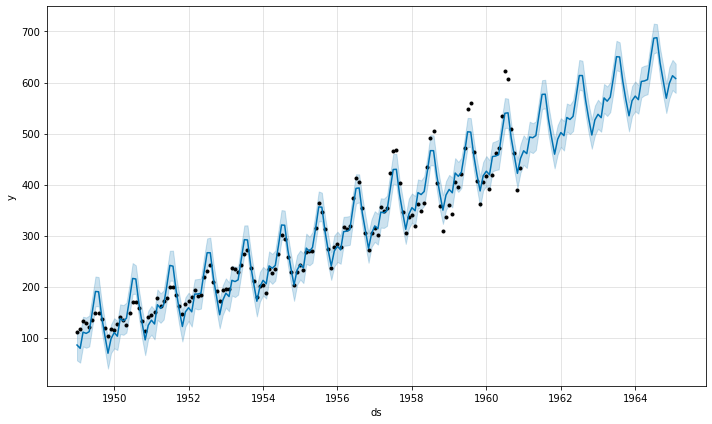

In [6]:
#Aplicamos la función y hacemos el modelo
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

Esta serie temporal tiene un ciclo anual, pero la estacionalidad en el pronóstico es demasiado grande al comienzo de la serie temporal y demasiado pequeña al final. En esta serie de tiempo, la estacionalidad no es un factor aditivo constante como lo supone Prophet por defecto, sino que crece con la tendencia. Esta es la estacionalidad multiplicativa.

### Cambiamos la frecuencia a multiplicativa

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


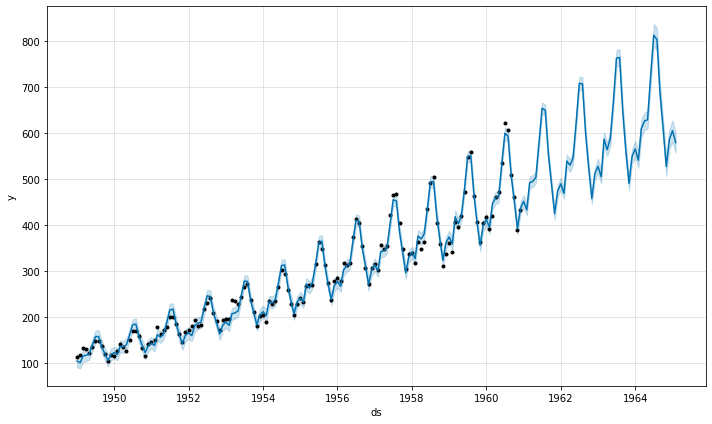

In [7]:
#Cambiando el factor para que sea multiplicativo
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)
#Vemos que este modelo es mucho, mucho mejor para el comportamiento del fenómeno
#Esto debido a la estacionalidad creciente